In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import numpy as np

In [2]:
# usar aca el path a la carpeta con datos descomprimidos
data_dir = Path("D:/transit-data/data-SNBE")

In [3]:
# esta celda tarda MUCHO TIEMPO, una mejor opción es usar la instancia de BigQuery 
combined_dataset = data_dir / "combined.pkl"
if not combined_dataset.exists():
    weekdays = ["Do","Lu", "Ma", "Mi", "Ju", "Vi", "Sa"]
    D = pd.concat([pd.read_csv(i, sep=";") for i in data_dir.glob("*.csv")])
    D["fechahoraevento"] = pd.to_datetime(D["fechahoraevento"])
    D["ymd"] = D["fechahoraevento"].apply(lambda x: f"{x.date()} ({weekdays[x.weekday()]})")
    D["year"] = D["fechahoraevento"].apply(lambda x: x.year)
    D["month"] = D["fechahoraevento"].apply(lambda x: x.month)
    D["day"] = D["fechahoraevento"].apply(lambda x: x.day)
    D["hour"] = D["fechahoraevento"].apply(lambda x: x.hour)
    D.to_pickle(combined_dataset)
else:
    D = pd.read_pickle(combined_dataset)

In [4]:
D.columns

Index(['serialtarjeta', 'idsam', 'fechahoraevento', 'producto', 'montoevento',
       'consecutivoevento', 'identidad', 'tipoevento', 'latitude', 'longitude',
       'idrutaestacion', 'tipotransporte', 'ymd', 'year', 'month', 'day',
       'hour'],
      dtype='object')

In [43]:
cond = (D["producto"] == "MO") & (D["tipoevento"] == 4) & (D["montoevento"] > 1000)
tarj_usos_por_dia = D[cond].groupby(["serialtarjeta", "year", "month", "day"]).agg(
    monto_total = pd.NamedAgg(column="montoevento", aggfunc="sum"),
    count_eventos = pd.NamedAgg(column="identidad", aggfunc="count"),
).reset_index()

<Axes: xlabel='monto_total', ylabel='count_eventos'>

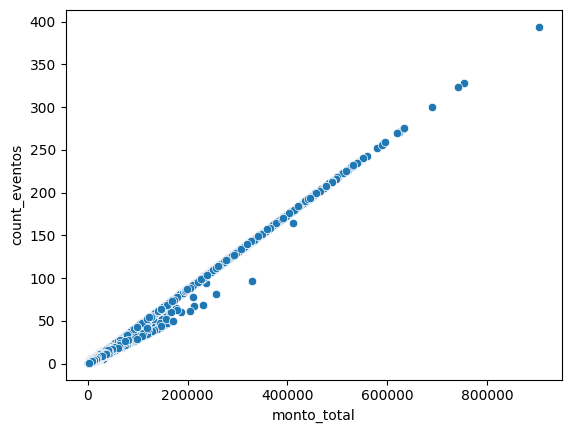

In [79]:
sns.scatterplot(data=tarj_usos_por_dia, x="monto_total", y="count_eventos")

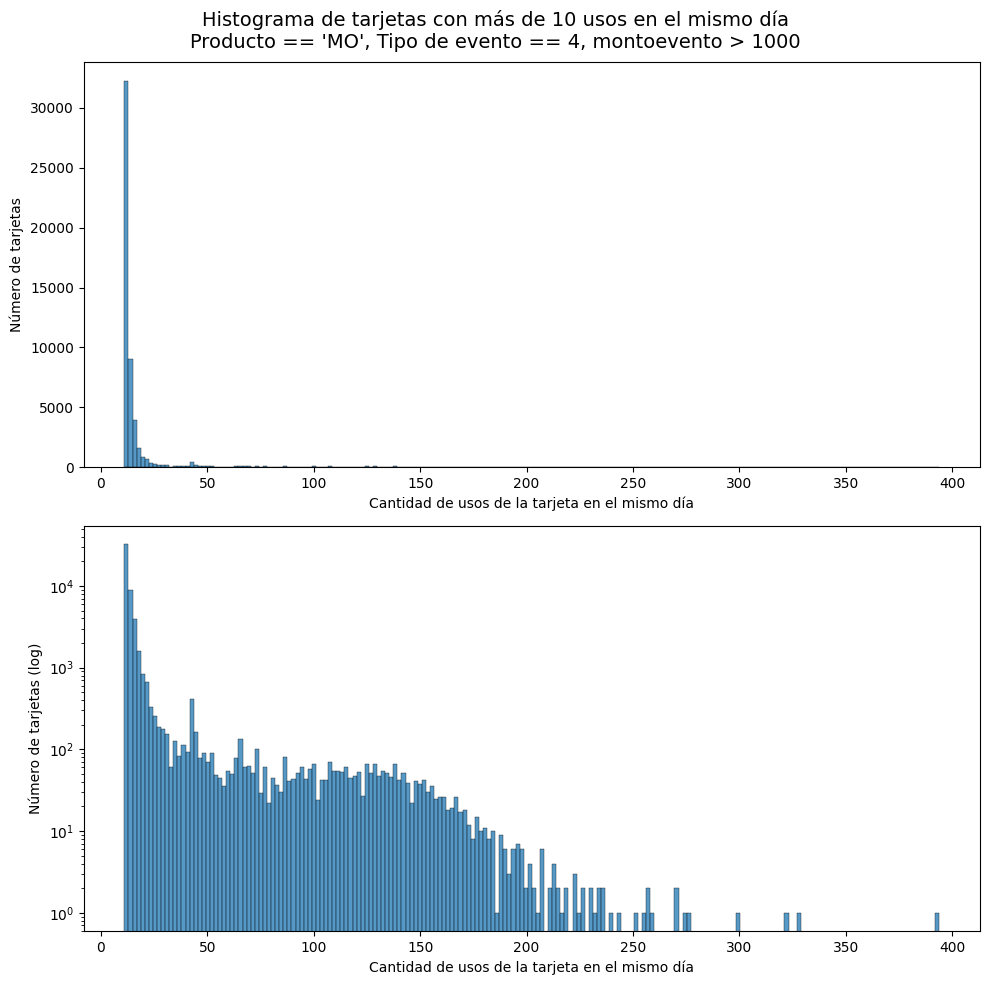

In [50]:
# visualizar casos en que la misma tarjeta se usó más dd 10 veces en la misma hora
fig, axs = plt.subplots(nrows=2, figsize=(10,10))
fig.suptitle("Histograma de tarjetas con más de 10 usos en el mismo día\nProducto == 'MO', Tipo de evento == 4, montoevento > 1000", fontsize=14)

cond = tarj_usos_por_dia["count_eventos"] > 10

ax = axs[0]
bins = 200
sns.histplot(tarj_usos_por_dia[cond]["count_eventos"], bins=bins, ax=ax)

ax.set_xlabel("Cantidad de usos de la tarjeta en el mismo día")
ax.set_ylabel("Número de tarjetas")

ax = axs[1]
sns.histplot(tarj_usos_por_dia[cond]["count_eventos"], bins=bins, ax=ax)

ax.set_yscale("log")

ax.set_xlabel("Cantidad de usos de la tarjeta en el mismo día")
ax.set_ylabel("Número de tarjetas (log)")

fig.tight_layout()

plt.show()
plt.close("all")

In [27]:
cond = (D["producto"] == "MO") & (D["tipoevento"] == 4) & (D["montoevento"] > 1000)
tarj_usos_por_hora = D[cond].groupby(["serialtarjeta", "year", "month", "day", "hour"]).agg(
    monto_total = pd.NamedAgg(column="montoevento", aggfunc="sum"),
    count_eventos = pd.NamedAgg(column="identidad", aggfunc="count"),
).reset_index()

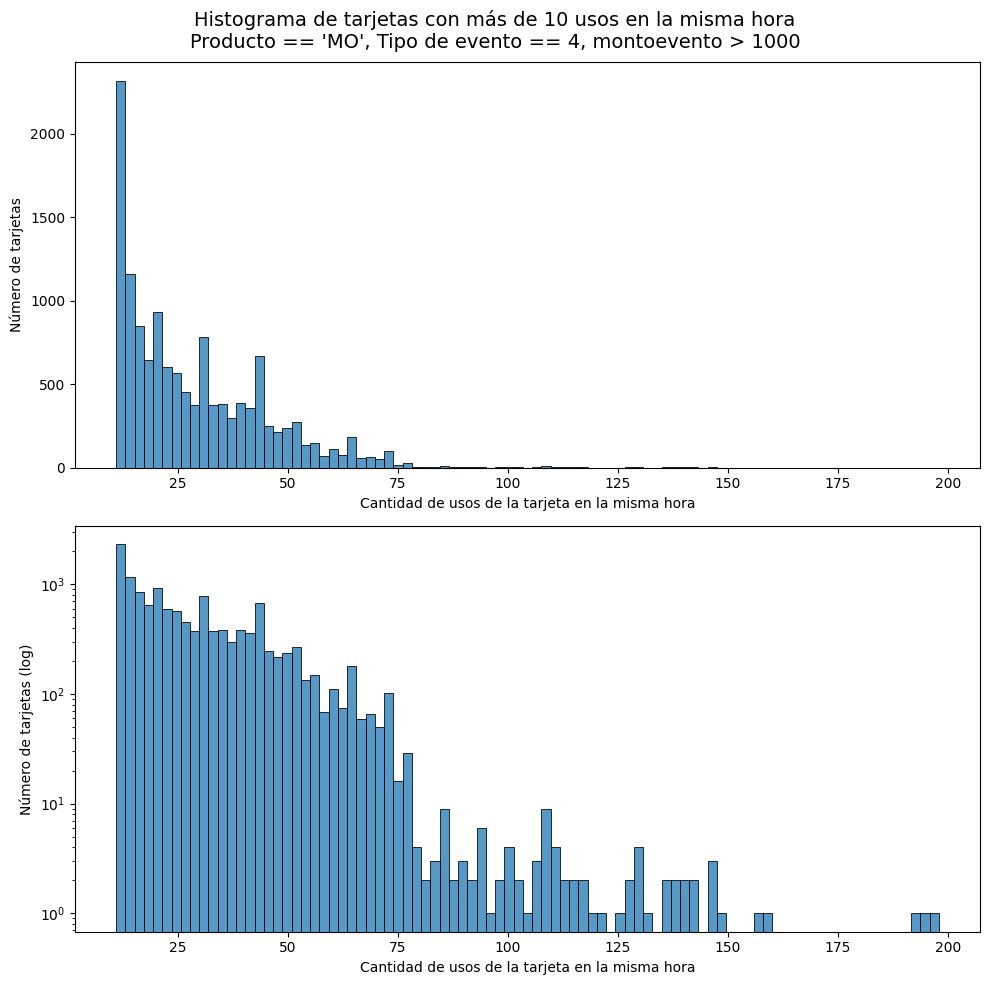

In [51]:
# visualizar casos en que la misma tarjeta se usó más dd 10 veces en la misma hora
fig, axs = plt.subplots(nrows=2, figsize=(10,10))
fig.suptitle("Histograma de tarjetas con más de 10 usos en la misma hora\nProducto == 'MO', Tipo de evento == 4, montoevento > 1000", fontsize=14)

cond = tarj_usos_por_hora["count_eventos"] > 10

ax = axs[0]
sns.histplot(tarj_usos_por_hora[cond]["count_eventos"], ax=ax)

ax.set_xlabel("Cantidad de usos de la tarjeta en la misma hora")
ax.set_ylabel("Número de tarjetas")

ax = axs[1]
sns.histplot(tarj_usos_por_hora[cond]["count_eventos"], ax=ax)

ax.set_yscale("log")

ax.set_xlabel("Cantidad de usos de la tarjeta en la misma hora")
ax.set_ylabel("Número de tarjetas (log)")

fig.tight_layout()

plt.show()
plt.close("all")

In [36]:
tarj_usos_por_hora.sort_values("monto_total", ascending=False)[:50]

,serialtarjeta,year,month,day,hour,monto_total,count_eventos
90885169,82c4a8979bc659819355a1177e330183,2022,12,29,13,453200,198
155433443,dfb108d31efcc775e60f7ed89eb64af6,2023,3,23,18,446200,194
36248627,342141b9073c68939b875bebf0b9ccbf,2023,2,16,19,441300,192
152055594,dad3ffa7aed8382afc4cdfd6fc0d9a99,2023,1,12,16,365000,159
68927751,630f3433cac0fb97cfd58cafca6be70c,2023,1,26,22,363200,158
171786120,f72be74d464a5ac27dba2a94cd313e4a,2023,3,30,20,341200,149
12520230,11fb5427b929900581d777131ae23c12,2023,3,16,13,337900,147
20058733,1cd3df0a72c092dc9769d12cab33f4d0,2022,12,22,18,335800,146
65426818,5e004ac1f93e708ed1a9669b3f88e051,2023,3,2,16,335800,146
8279302,0beeba7e247ad279495ad3cf88368d46,2022,10,26,11,328900,143


In [73]:
tarjeta = "541dfacf4f709b7c070bfcc3b53b30dc"
# year, month, day = 2022, 12, 29
# cond = (D["serialtarjeta"] == tarjeta) & (D["year"] == year) & (D["month"] == month) & (D["day"] == day)
# max_eventos_en_hora = D[cond]

In [74]:
max_eventos_en_hora["idsam"].unique(), max_eventos_en_hora["idrutaestacion"].unique()

(array([], dtype=object), array([], dtype=object))

In [75]:
cond = (D["serialtarjeta"] == tarjeta)
tarj_max_eventos_hora = D[cond]

In [78]:
tarj_max_eventos_hora.describe()

,montoevento,consecutivoevento,identidad,tipoevento,latitude,longitude,tipotransporte,year,month,day,hour
count,6861.000000,6861.000000,6861.0,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.00000
mean,2926.497595,4341.372249,3.0,4.000583,-25.245637,-57.198900,2.142691,2022.259729,6.113686,15.278822,18.42676
std,546.750637,2126.296793,0.0,0.048291,1.833656,4.154505,0.989839,0.438518,3.894702,8.523553,5.43845
min,0.000000,636.000000,3.0,4.000000,-25.379450,-57.501950,1.000000,2022.000000,1.000000,1.000000,0.00000
25%,2300.000000,2515.000000,3.0,4.000000,-25.378830,-57.500590,1.000000,2022.000000,2.000000,8.000000,13.00000
50%,3400.000000,4340.000000,3.0,4.000000,-25.378800,-57.500550,3.000000,2022.000000,6.000000,15.000000,22.00000
75%,3400.000000,6189.000000,3.0,4.000000,-25.378760,-57.500530,3.000000,2023.000000,10.000000,23.000000,23.00000
max,3400.000000,8016.000000,3.0,8.000000,0.000000,0.000000,3.000000,2023.000000,12.000000,30.000000,23.00000


In [77]:
tarj_max_eventos_hora["idsam"].unique(), tarj_max_eventos_hora["idrutaestacion"].unique(), tarj_max_eventos_hora["ymd"].unique()

(array(['04362cd2955d80', '04351922b95a80', '04342d22b95a80',
        '04343022b95a80', '04321e22b95a80', '041b22e24e6180',
        '043522d2955d80', '041f16d2955d80', '04351722b95a80',
        '04362ad2955d80', '043712d2955d80', '041f1ed2955d80',
        '04353dd2955d80', '043523d2955d80', '041f19d2955d80',
        '04332c22b95a80', '041f24d2955d80', '043f28da955d80',
        '04342122b95a80', '041b2ae24e6180', '043f21da955d80',
        '04132622626c80', '04343122b95a80', '041f1bd2955d80',
        '043f24da955d80', '041d3de24e6180', '04370ed2955d80',
        '04351622b95a80', '043711d2955d80', '041f1ad2955d80',
        '04362bd2955d80', '04362fd2955d80', '04372bd2955d80',
        '04330dd2955d80', '041d2be24e6180', '041b2ee24e6180',
        '041b23e24e6180', '04342022b95a80', '04134222626c80',
        '04341f22b95a80', '041f21d2955d80', '043619d2955d80',
        '041b2ce24e6180', '043616d2955d80', '041f22d2955d80',
        '04330cd2955d80', '04343422b95a80', '043f22da955d80',
        

In [ ]:
# usuarios por día
usuario_por_dia = D[["ymd", "serialtarjeta", "idrutaestacion"]].groupby(["ymd", "idrutaestacion"])["serialtarjeta"].nunique().reset_index()
usuario_por_dia


In [ ]:
idsam_idrutaestacion = D[["idsam", "idrutaestacion"]].drop_duplicates()

In [ ]:
tarj_dia = D[["serialtarjeta", "ymd"]].copy()

In [ ]:
tarj_dia["val"] = 1
usos_tarj_dia = tarj_dia.groupby(["serialtarjeta", "ymd"]).count()

In [ ]:
count_usos_tarj_dia = usos_tarj_dia.reset_index().sort_values("val", ascending=False)

In [ ]:
count_usos_tarj_dia_top50 = count_usos_tarj_dia[:50]

In [ ]:
data = {k:[] for k in ["serialtarjeta", "ymd", "montoevento", "tipoevento", "idrutaestacion"]}
for i, r in count_usos_tarj_dia_top50.iterrows():
    cond = (D["serialtarjeta"] == r["serialtarjeta"]) & (D["ymd"] == r["ymd"])
    d = D[cond]
    for _, rr in d.iterrows():
        data["serialtarjeta"].append(rr["serialtarjeta"])
        data["ymd"].append(rr["ymd"])
        data["montoevento"].append(rr["montoevento"])
        data["tipoevento"].append(rr["tipoevento"])
        data["idrutaestacion"].append(rr["idrutaestacion"])
top_spenders = pd.DataFrame(data)

In [ ]:
tarjeta = "" #rellenar con la tarjeta a analizar
dia = "2022-04-25 (Do)"
cond = (D["serialtarjeta"] == tarjeta) & (D["ymd"] == dia)


In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
sns.histplot(D[cond], x="hour", bins=range(24))
ax.set_ylabel("cantidad de eventos")
ax.set_xlabel("hora")
ax.set_title(f"Cantidad de eventos para tarjeta <ANONIMIZADO> el {dia}\n# de eventos: {D[cond].shape[0]} monto: {D[cond]['montoevento'].sum()}")
plt.show()
plt.close("all")


In [ ]:
top_spenders.groupby(["serialtarjeta", "ymd"]).agg({"montoevento":"sum", "tipoevento":"count", "idrutaestacion":"nunique"})

In [ ]:
D[D["serialtarjeta"] == "18f6e00ec04d8e05438254c3b1e8502b"].to_csv("biggest_spender.csv")

In [ ]:
users_by_month.reset_index().to_csv("tarjeta_dia_mes.csv")

In [ ]:
cond = usuario_por_dia["idrutaestacion"].isin(['0091', '0016', '0155', '0090', '005b', '0143', '005c', '0145'])
d = usuario_por_dia[cond].pivot(index="ymd", columns="idrutaestacion", values="serialtarjeta").fillna(0)

cond = ~usuario_por_dia["idrutaestacion"].isin(['0000'])
d = usuario_por_dia[cond].pivot(index="ymd", columns="idrutaestacion", values="serialtarjeta").fillna(0)

cmap=plt.get_cmap("crest_r")
cmap.set_under("lightsalmon")
f, ax = plt.subplots(figsize=(30, 70))
sns.heatmap(d.astype(int).T, 
            annot=True,
            cmap=cmap,
            vmin=1,
            fmt=",",
            ax=ax)
ax.set_ylabel("día")
ax.set_xlabel("ID Ruta/Estación")
ax.set_title(f"Cantidad tarjetas activas por día e ID Ruta/Estación")
plt.savefig(f'usuarios-por-dia.pdf', bbox_inches='tight')
plt.show()
plt.close("all")

In [ ]:
dd = D[cond][["ymd", "hour", "idrutaestacion", "idsam"]].copy()
d = dd.groupby(["ymd", "hour", "idrutaestacion"])["idsam"].nunique().reset_index()

In [ ]:
rutaestacion = "005a"
cond = d["idrutaestacion"] == rutaestacion
d = d[cond].pivot(index="ymd", columns="hour", values="idsam").fillna(0)

In [ ]:
cmap=plt.get_cmap("crest_r")
cmap.set_under("lightsalmon")
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(d.astype(int), 
            annot=True,
            cmap=cmap,
            vmin=1,
            fmt=",",
            ax=ax)
ax.set_ylabel("día")
ax.set_xlabel("hora")
ax.set_title(f"Cantidad de SAMs activos por día/hora para ID Ruta/Estación = {rutaestacion}")
plt.show()
plt.close("all")

In [80]:
monto_by_x = D.groupby(["tipoevento", "tipotransporte", "producto", "year", "month"])["montoevento"].sum().reset_index()

In [81]:
monto_by_x["ym"] = monto_by_x["year"].astype("str") + "/" + monto_by_x["month"].astype("str")

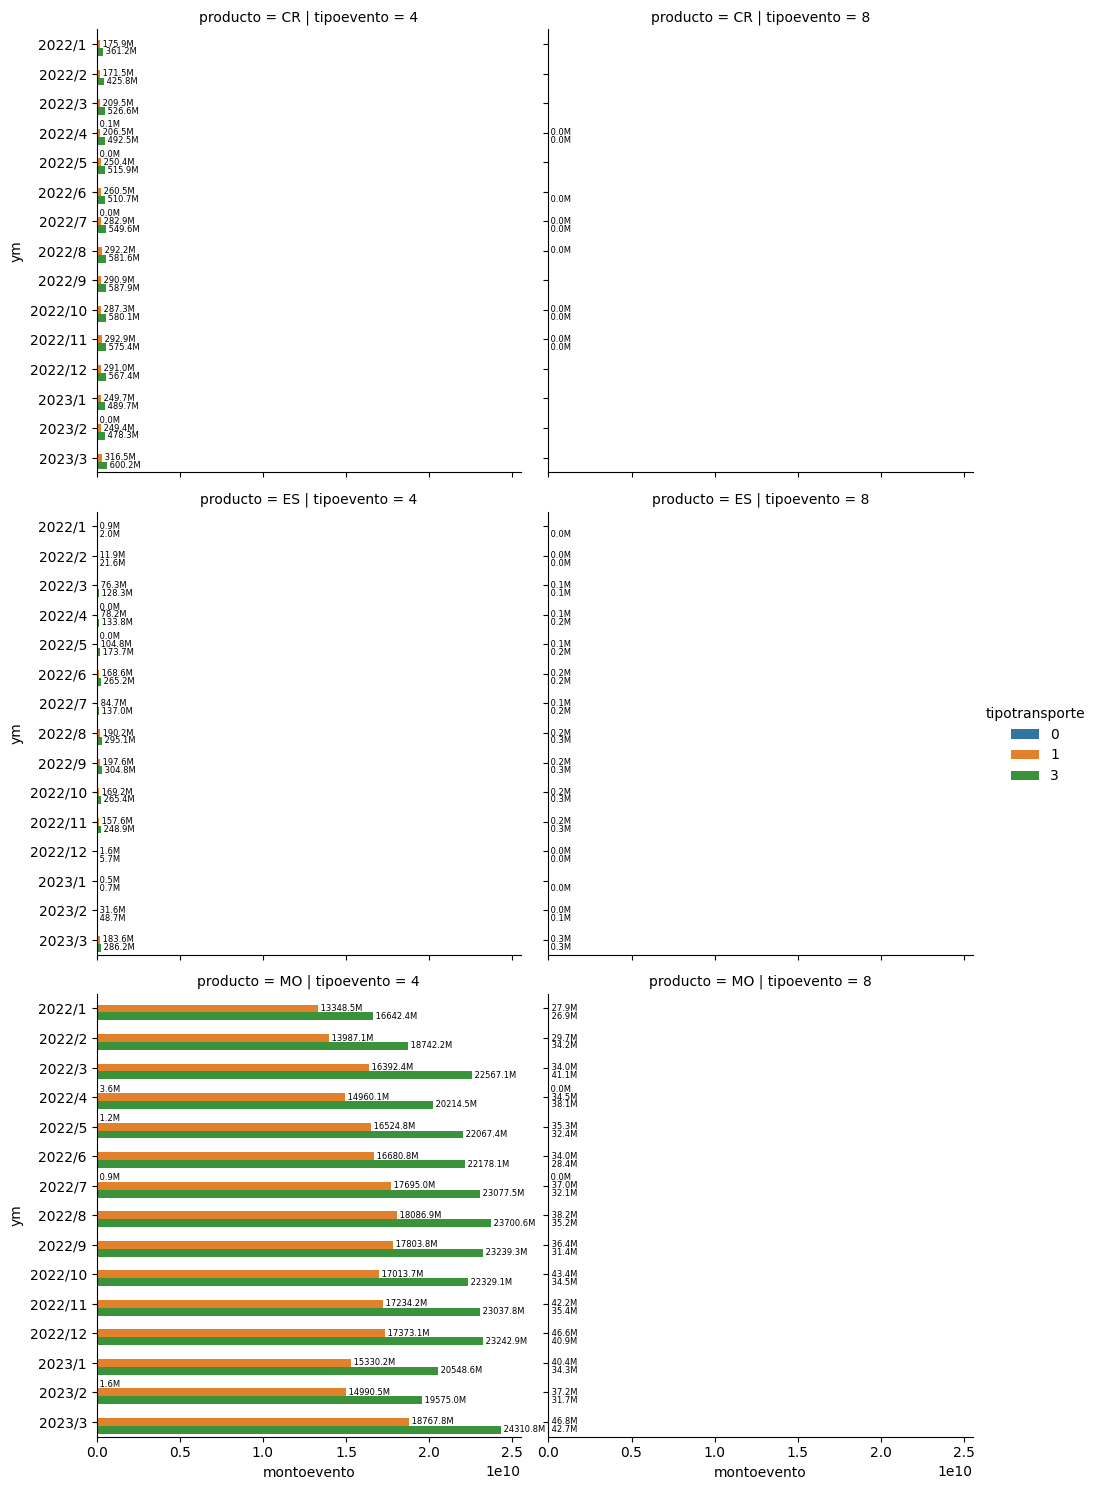

In [82]:
cond = monto_by_x["tipoevento"] == 4
g = sns.catplot(data=monto_by_x.sort_values(["year", "month"]),
                x="montoevento",
                y="ym",
                #col="tipoevento",
                hue="tipotransporte",
                row="producto",
                kind="bar")
# iterate through axes
def to_int(x):
    if np.isnan(x):
        return 0
    return int(x)

for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f' {to_int(v.get_width())/1000000:.1f}M' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=6)
    #ax.margins(y=0.2)
    #ax.set_xscale("log")
#g.set_xticklabels(rotation=30)
fig = g.get_figure()
fig.savefig("img/distribucion-monto-por-mes.png")
fig.savefig("img/distribucion-monto-por-mes.pdf")
plt.show()

In [84]:
monto_by_x[monto_by_x["tipotransporte"] == 3].describe()

,tipoevento,tipotransporte,year,month,montoevento
count,80.000000,80.0,80.000000,80.000000,8.000000e+01
mean,5.750000,3.0,2022.187500,5.725000,4.201930e+09
std,1.996833,0.0,0.392775,3.593155,8.507300e+09
min,4.000000,3.0,2022.000000,1.000000,0.000000e+00
25%,4.000000,3.0,2022.000000,2.750000,5.694750e+05
50%,4.000000,3.0,2022.000000,5.000000,8.846402e+07
75%,8.000000,3.0,2022.000000,9.000000,5.693742e+08
max,8.000000,3.0,2023.000000,12.000000,2.431084e+10


In [ ]:
cond = (D["producto"] == "MO") & (D["tipoevento"] == 4)
tarj_counts = D[cond]["serialtarjeta"].value_counts()

In [ ]:
sns.kdeplot(tarj_counts)

In [ ]:
sns.kdeplot(tarj_counts[tarj_counts < 1000])

In [85]:
D

,serialtarjeta,idsam,fechahoraevento,producto,montoevento,consecutivoevento,identidad,tipoevento,latitude,longitude,idrutaestacion,tipotransporte,ymd,year,month,day,hour
0,5f868508278068444f6d3ebba07b53f9,0408351a846280,2022-01-30 23:59:30,MO,2300,66,3,4,-25.31210,-57.58675,0091,1,2022-01-30 (Sa),2022,1,30,23
1,5f868508278068444f6d3ebba07b53f9,0408351a846280,2022-01-30 23:59:24,MO,2300,65,3,4,-25.31210,-57.58676,0091,1,2022-01-30 (Sa),2022,1,30,23
2,5f868508278068444f6d3ebba07b53f9,0408351a846280,2022-01-30 23:59:20,MO,2300,64,3,4,-25.31210,-57.58676,0091,1,2022-01-30 (Sa),2022,1,30,23
3,d3920a8d2b256df92809fec81bfe2338,0408351a846280,2022-01-30 23:59:12,MO,2300,258,3,4,-25.31210,-57.58676,0091,1,2022-01-30 (Sa),2022,1,30,23
4,d3920a8d2b256df92809fec81bfe2338,0408351a846280,2022-01-30 23:59:08,MO,2300,257,3,4,-25.31210,-57.58676,0091,1,2022-01-30 (Sa),2022,1,30,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15789063,6d843236281f72bfb5c7a09670581314,041f1ae24e6180,2022-09-01 00:00:58,MO,2300,311,3,4,-25.28009,-57.64297,0090,1,2022-09-01 (Mi),2022,9,1,0
15789064,5143d75e64e86d49b46ca736528090ad,04421f2a846280,2022-09-01 00:00:26,MO,3400,582,2,4,-25.26310,-57.59296,0021,3,2022-09-01 (Mi),2022,9,1,0
15789065,2c84a147486b58c7ece4da0b60fee32c,04421f2a846280,2022-09-01 00:00:22,MO,3400,612,2,4,-25.26310,-57.59296,0021,3,2022-09-01 (Mi),2022,9,1,0
15789066,cfedb51ad5f6d888f3f02e3bd1c400d9,043c1942846280,2022-09-01 00:00:14,CR,500,1046,2,4,-25.34468,-57.50354,0043,3,2022-09-01 (Mi),2022,9,1,0
